In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'

In [3]:
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


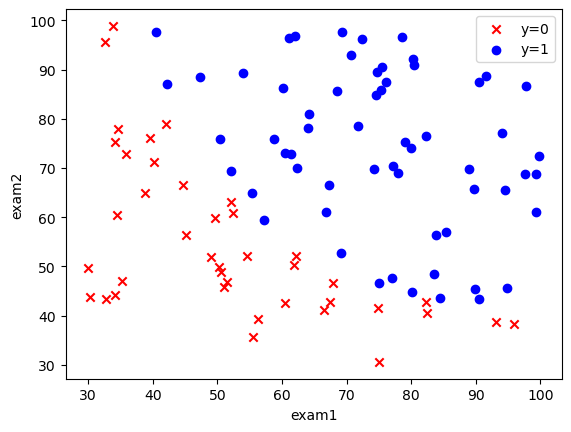

In [4]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',
          ylabel='exam2')
plt.show()

In [5]:
def get_Xy(data):
    
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values
    
    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)
    
    return X,y

In [6]:
X,y = get_Xy(data)

In [7]:
X.shape

(100, 3)

In [8]:
y.shape

(100, 1)

In [9]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [10]:
def costFunction(X,y,theta):
    
    A = sigmoid(X@theta)
    
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    
    return -np.sum(first + second) / len(X)

In [11]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [12]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [13]:
def gradientDescent(X,y,theta,iters,alpha):
    m = len(X)
    costs = []
    
    for i in range(iters):
        A = sigmoid(X@theta)
        theta  = theta -(alpha/m)  * X.T @ (A - y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
            
    return costs, theta

In [14]:
alpha = 0.004
iters=200000

In [15]:
costs,theta_final =  gradientDescent(X,y,theta,iters,alpha)

1.9886538578930084
3.078170019864155
5.487009635362496
1.8519433661332634
2.9551289424083595
5.438688730769618
1.804612809072851
2.8312715776074047
5.3886531633606145
1.756153811712155
2.706676380747814
5.3365673644957425
1.7062807047694801
2.5818508519054273
5.281774101800353
1.654412995851205
2.4578430947435757
5.223255119969365
1.5996612097145546
2.3362477519414626
5.159653459570274
1.5408871901849084
2.2190492038468905
5.089387088751128
1.476856785108147
2.10826850905365
5.010845104587983
1.4064493632805843
2.005433890383272
4.9225734611717336
1.3288041261254444
1.9109646054893654
4.823257484826611
1.2432202250971678
1.8235866121521414
4.711246821296763
1.1486277932139577
1.7397667362448002
4.58325740045735
1.0423478306006695
1.652586574603404
4.430932868329269
0.9166267386002209
1.5465331276550867
4.224624720512682
0.7330944584991163
3.9520709655769544
1.115095340214284
3.93912521174624
0.4181482209600352
3.7379122586603324
0.28403008381623446
0.8040201118506516
0.2683963264620448

In [16]:
theta_final

array([[-23.77314018],
       [  0.18687162],
       [  0.18041411]])

In [17]:

def predict(X,theta):
    
    prob = sigmoid(X@theta)
    
    return [1 if x >= 0.5 else 0 for x in prob]

In [18]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc  = np.mean(y_pre == y)

print(acc)

0.86


In [19]:
coef1 = - theta_final[0,0] / theta_final[2,0]
coef2 = - theta_final[1,0] / theta_final[2,0]

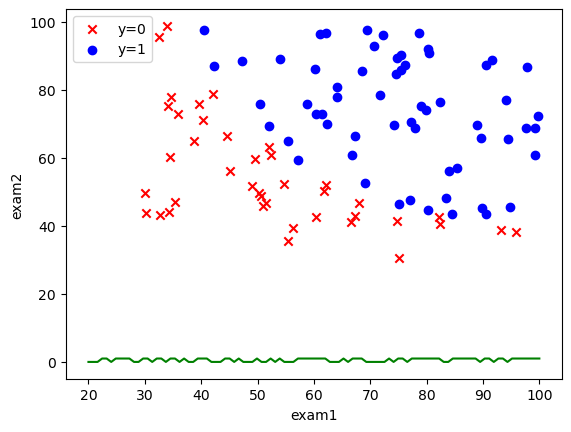

In [20]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',
          ylabel='exam2')

ax.plot(x,y,c='g')
plt.show()

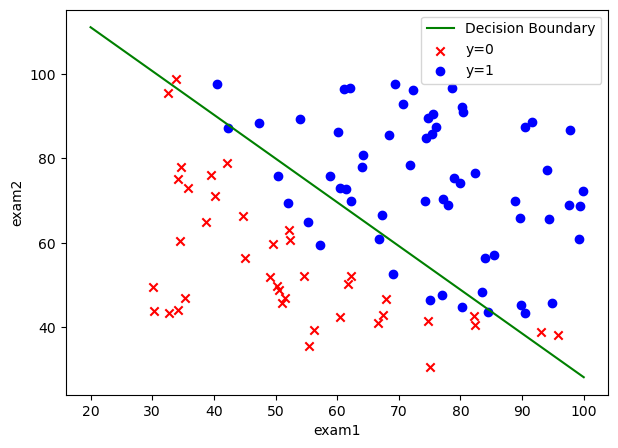

In [21]:
fig,ax = plt.subplots(figsize=(7,5))

#绘制直线
x = np.linspace(20,100,2)#在20到100之前绘制2个点确定直线，注意纵轴为Exam2，刻度在20-100
y_ = coef1 + coef2 * x
ax.plot(x,y_,c='g',label='Decision Boundary')

#绘制原始数据
ax.scatter(data[data['Accepted']==0]['Exam 1'], data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')		   
ax.scatter(data[data['Accepted']==1]['Exam 1'], data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')

ax.legend()#显示标签label
ax.set(xlabel='exam1', ylabel='exam2')
plt.show()
